# Image Augmentation

Image augmentation technology expands the scale of
training data sets by making a series of random changes to the training images
to produce similar, but different, training examples. Given its popularity in
computer vision, the `mxnet.gluon.data.vision.transforms` model provides
multiple pre-defined image augmentation methods. In this section we will briefly
go through this module.  

First, import the module required for this section.

In [1]:
from matplotlib import pyplot as plt
from mxnet import image
from mxnet.gluon import data as gdata, utils 

Then read the sample $400\times 500$ image.

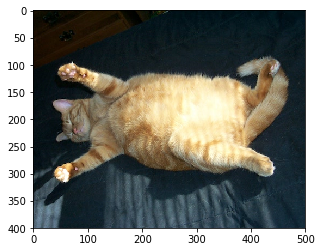

In [2]:
utils.download('https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/cat.jpg')
img = image.imread('cat.jpg')
plt.imshow(img.asnumpy())
plt.show()

In addition, we define a function to draw a list of images.

In [3]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j].asnumpy())
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

Most image augmentation methods have a certain degree of randomness. To make it
easier for us to observe the effect of image augmentation, we next define the
auxiliary function `apply`. This function runs the image augmentation method
`aug` multiple times on the input image `img` and shows all results.

In [4]:
def apply(img, aug, num_rows=2, num_cols=4, scale=3):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

## Flip and Crop

Flipping the image left and right usually does not change the
category of the object. This is one of the earliest and most widely used methods
of image augmentation. Next, we use the `transforms` module to create the
`RandomFlipLeftRight` instance, which introduces a 50% chance that the image is
flipped left and right.

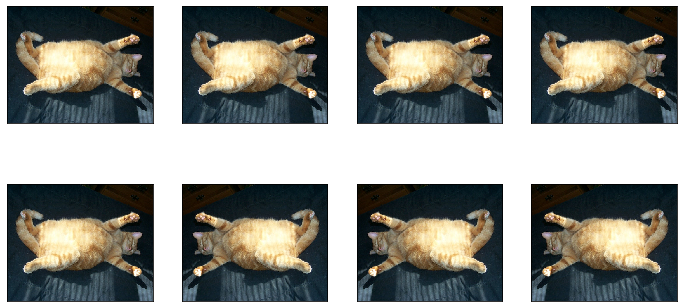

In [5]:
apply(img, gdata.vision.transforms.RandomFlipLeftRight())

Flipping up and down is not as commonly used as flipping left and right.
However, at least for this example image, flipping up and down does not hinder
recognition. Next, we create a `RandomFlipTopBottom` instance for a 50% chance
of flipping the image up and down.

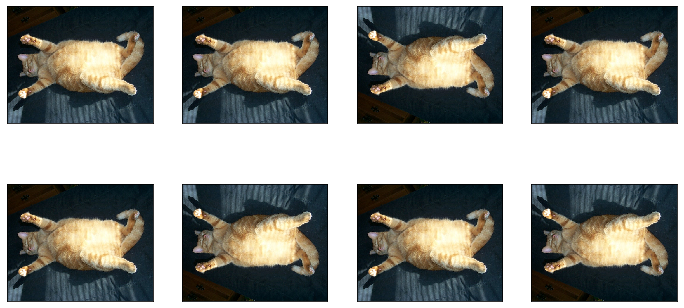

In [6]:
apply(img, gdata.vision.transforms.RandomFlipTopBottom())

In the example image we used, the cat is in the middle of the image, but this
may not be the case for all images. In the [“Pooling
Layer”](../chapter_convolutional-neural-networks/pooling.md) section, we
explained that the pooling layer can reduce the sensitivity of the convolutional
layer to the target location. In addition, we can make objects appear at
different positions in the image in different proportions by randomly cropping
the image. This can also reduce the sensitivity of the model to the target
position.

In the following code, we randomly crop a region with an area of 10%
to 100% of the original area, and the ratio of width to height of the region is
randomly selected from between 0.5 and 2. Then, the width and height of the
region are both scaled to 200 pixels. Unless otherwise stated, the random number
between $a$ and $b$ in this section refers to a continuous value obtained by
uniform sampling in the interval $[a,b]$.

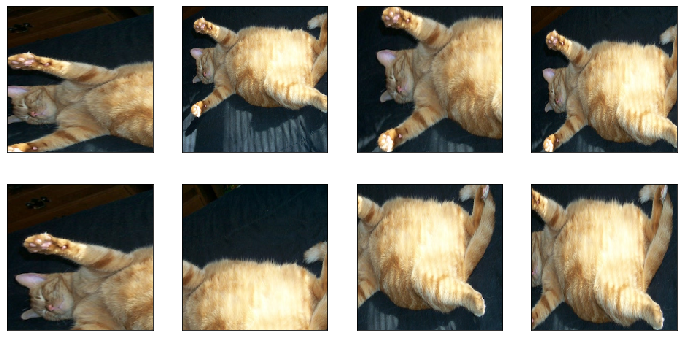

In [7]:
shape_aug = gdata.vision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

## Change Color

Another augmentation method is changing colors. We can change
four aspects of the image color: brightness, contrast, saturation, and hue. In
the example below, we randomly change the brightness of the image to a value
between 50% ($1-0.5$) and 150% ($1+0.5$) of the original image.

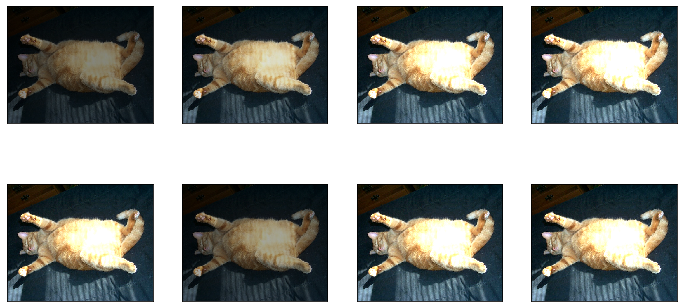

In [8]:
apply(img, gdata.vision.transforms.RandomBrightness(0.5))

Similarly, we can randomly change the hue of the image.

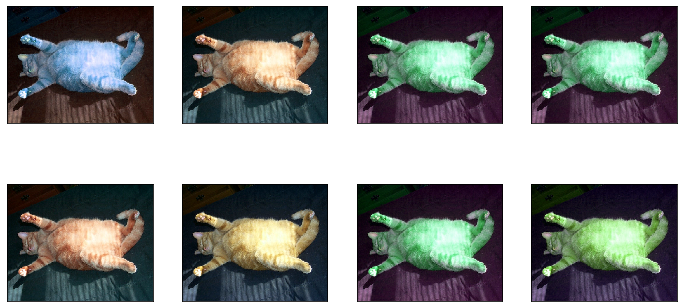

In [9]:
apply(img, gdata.vision.transforms.RandomHue(0.5))

We can also create a `RandomColorJitter` instance and set how to randomly change
the `brightness`, `contrast`, `saturation`, and `hue` of the image at the same
time.

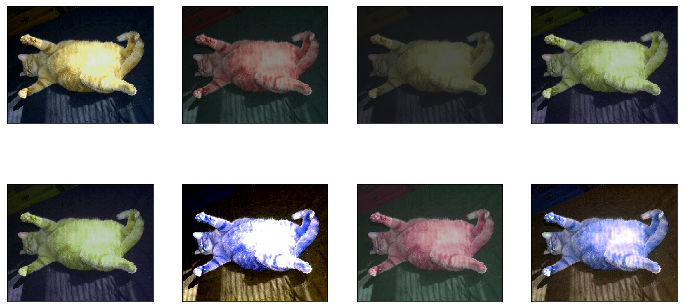

In [10]:
color_aug = gdata.vision.transforms.RandomColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

## Overlying Multiple Image Augmentation Methods

In practice, we will overlay
multiple image augmentation methods. We can overlay the different image
augmentation methods defined above and apply them to each image by using a
`Compose` instance.

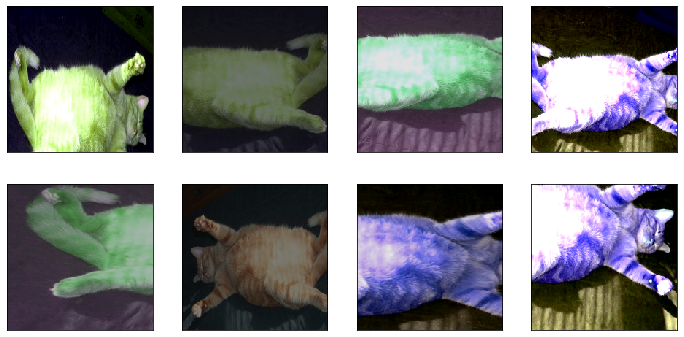

In [11]:
augs = gdata.vision.transforms.Compose([
    gdata.vision.transforms.RandomFlipLeftRight(), color_aug, shape_aug])
apply(img, augs)